### <center>Machine Learning </center>
### <center>Exercise No. 5: Logistic Regression using sklearn</center>

**Aim:** To implement Logistic Regression using sklearn and evaluate the performance using confusion matrix<br>
**Prerequisites:** Basic Data structures in python like list, tuple, dictionaary and control structures in python, sklearn<br>
**Outcomes:** After completion of this experiment students will be able to:
              1. implement logistic regression on any dataset using sklearn
              2. Display and analyse confusion matrix

### Classification

Classification techniques are an essential part of machine learning and data mining applications. Approximately 70% of problems in Data Science are classification problems. There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable. 

Logistic Regression can be used for various classification problems such as spam detection. Diabetes prediction, if a given customer will purchase a particular product or will they churn another competitor, whether the user will click on a given advertisement link or not, and many more examples are in the bucket.

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

To go from a linear regression to a logistic regression, you can substitute the OLS output
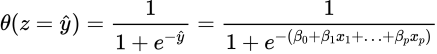
This function reinterprets the OLS output as a probability. The formula above represents the output of a logistic regression model.

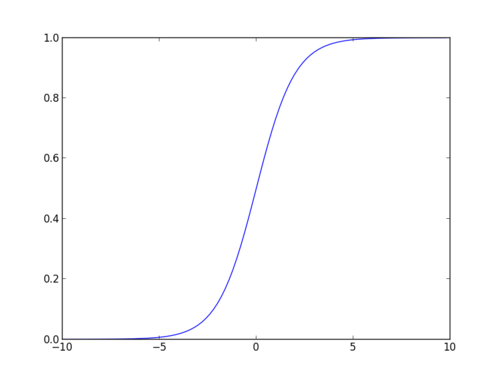

Classification performance is best described by an aptly named tool called the confusion matrix or truth table. Understanding the confusion matrix requires becoming familiar with several definitions. But before introducing the definitions, a basic confusion matrix for a binary or binomial classification must first be looked at where there can be two classes (say, Y or N). The accuracy of classification of a specific example can be viewed in one of four possible ways:

•
The predicted class is Y, and the actual class is also Y → this is a True Positive or TP

•
The predicted class is Y, and the actual class is N → this is a False Positive or FP

•
The predicted class is N, and the actual class is Y → this is a False Negative or FN

•
The predicted class is N, and the actual class is also N → this is a True Negative or TN

The predicted classes are arranged horizontally in rows and the actual classes are arranged vertically in columns, although sometimes this order is reversed

Precision is defined as the proportion of cases found that were actually relevant. Therefore precision is TP/(TP+FP).

Recall is defined as the proportion of the relevant cases that were actually found among all the relevant cases. Recall is the same as sensitivity, because recall is also given by TP/(TP+FN).

Accuracy is defined as the ability of the classifier to select all cases that need to be selected and reject all cases that need to be rejected. For a classifier with 100% accuracy, this would imply that FN = FP = 0. Note that in the document search example, we have not indicated the TN, as this could be really large. Accuracy is given by (TP+TN)/(TP+FP+TN+FN).


one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics). AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
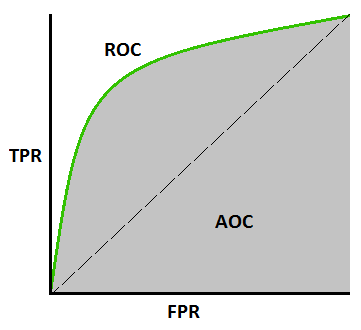
An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
datasets = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

In [ ]:
X.shape

In [ ]:
unique_labels = datasets.iloc[:, 4].unique()
print(unique_labels)
unique_labels=np.array(unique_labels)
type(unique_labels)

In [ ]:
output=pd.DataFrame(Y)
output.head()

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
X_Train.shape

In [ ]:
Y_Train.shape

In [ ]:
X_Test.shape

In [ ]:
# Fitting the Logistic Regression into the Training set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,roc_curve,auc
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)
prob_score=classifier.predict_proba(X_Test)
y_scores = classifier.decision_function(X_Test)
precision, recall, thresholds = precision_recall_curve(Y_Test, y_scores)
plt.figure()
plt.plot(precision, recall, label = 'Precision-Recall Curve')

In [ ]:
Y_Pred[0:5]

In [ ]:
Y_Test[0:]

In [ ]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix,precision_score,recall_score

cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
r=cm.shape[0]
c=cm.shape[1]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

thresh = cm.max() / 2.
for i in range(r):
    for j in range(c):
        plt.text(j, i, format(cm[i, j], '0.2f'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# Visualising the Training set results 

#from matplotlib.colors import ListedColormap
#X_Set, Y_Set = X_Train, Y_Train
#X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
#                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

#plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 #            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(Y_Test,Y_Pred))
print(recall_score(Y_Test,Y_Pred))

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)

In [ ]:
auc = roc_auc_score(Y_Test, Y_Pred)
print('AUC: %.3f' % auc)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_Train, Y_Train)

In [ ]:
Y_Pred_cv=clf.predict(X_Test)

In [ ]:
prob_score_cv=clf.predict_proba(X_Test)
#print(prob_score_cv)
y_scores_cv = clf.decision_function(X_Test)
print(y_scores_cv)

In [ ]:
print(classification_report(Y_Test,Y_Pred_cv))